In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data from the CSV file
file_path = "/Users/yeshwanthsatyadev/Downloads/Fraud_check (1).csv"  
fraud_data = pd.read_csv(file_path)

In [6]:
# Create 'Risk' column
fraud_data['Risk'] = pd.cut(fraud_data['Taxable.Income'], bins=[-float('inf'), 30000, float('inf')], labels=['Risky', 'Good'])

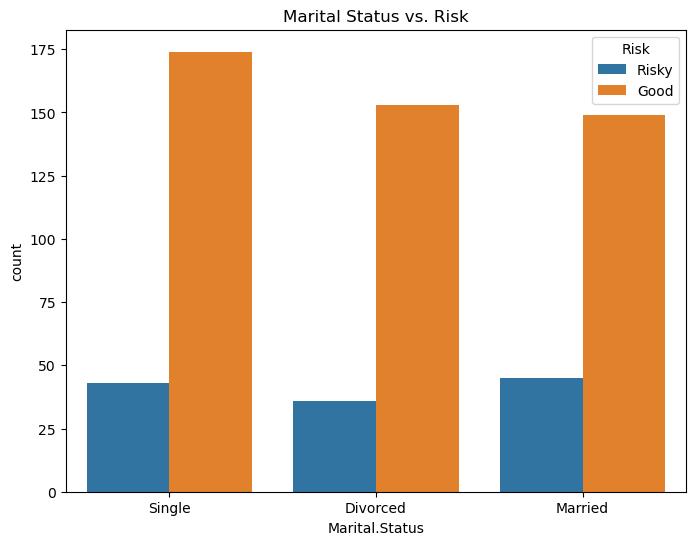

In [7]:
# Visualize the relationship between Marital Status and Risk
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital.Status', hue='Risk', data=fraud_data)
plt.title('Marital Status vs. Risk')
plt.show()


In [8]:
# Prepare the data for modeling
X = fraud_data.drop(['Taxable.Income', 'Risk'], axis=1)
y = fraud_data['Risk']
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [9]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score

# Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [13]:
# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.77      0.94      0.85        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120

[[88  6]
 [26  0]]
